<a href="https://colab.research.google.com/github/chandusayhi/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Every year, more than 140 million bookings made on the internet and many hotel bookings made through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. According to Google data, hotels are booked in advance of 12 weeks.

This dataset contains 31 features about booking information such as Average Daily Rate, Arrival Time, Room Type, Special Request, etc. between 2015 and 2017 years.

Here I would like to show some booking information details with exploratory data analysis, some feature engineering, reviewing correlations between features and visualizing most important features and their interesting distribution properties. 

## **Dataset Information**

- **Hotel**
 * H1: Resort hotel 
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days that elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_number**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


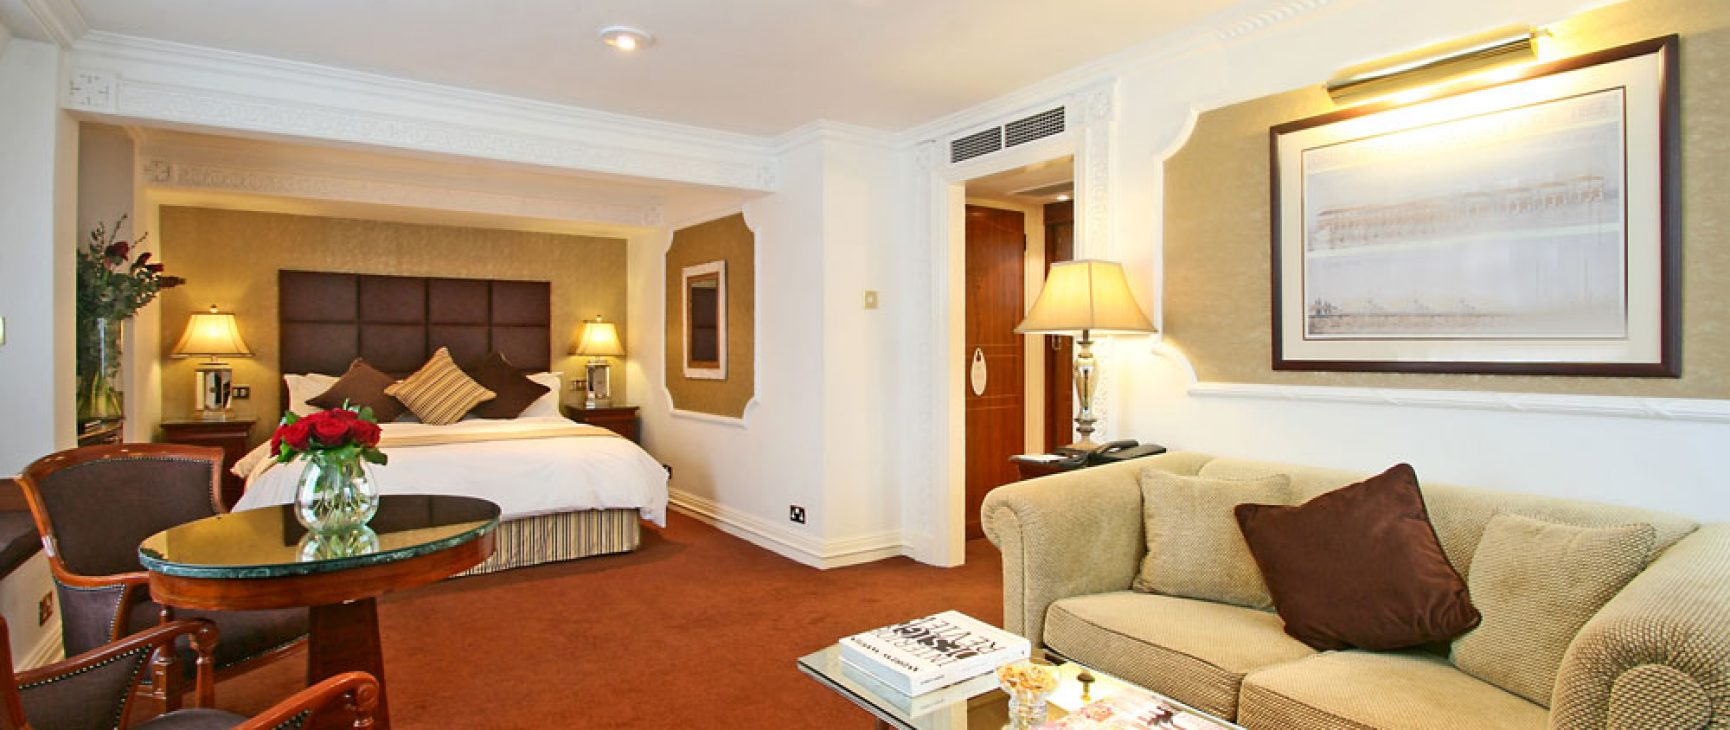

In [2]:
# Mounting the drive to access the dataset present in the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing necessary libraries to be used in the project

#libraries to load the dataset and to perfrom analysis on the dataset
import numpy as np
import pandas as pd

#libraries for visulaization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
sns.set_style("dark")

#libraries for easy to visualize data on an interactive leaflet map
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [4]:
# Reading the dataset from the drive
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capestone_Projects/EDA_Hotel_Booking_Analysis/Hotel Bookings.csv')

In [5]:
# checking the shape of the dataset
df.shape

(119390, 32)

Hotel Booking Analysis dataset has a huge number of observations. We have a whopping 1 lakh 19 thousand 3 hundred ninteen observations that are spread across 32 different features.

In [6]:
# checking some basic information about different features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<b>Observations</b> :

The columns of the dataset are of heterogeneous datatypes. Columns are either object, integer or float type.
Also we can see observe that a few columns have missing values. We need to deal with them as we proceed in the project.
The float type columns are - children, company, agent and adr. Out of these four, columns-

a. children - contains information of the number of children along.

b. company - might be the company code.

c. agent - might contain the information about the agent code.

Due to the presence of null-values in these columns the datatype is float as float datatype supports the storage of NaN as a value. 

In [7]:
# checking the first ten observations of the dataset with head() method
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [8]:
# checking the last five observations using tail() method.
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [9]:
#Make a copy of this df indices and data to data.
data = df.copy()

In [10]:
# List of numerical variables

numerical_features= [feature for feature in data.columns if data[feature].dtypes!='O']

print('Number of numerical values', len(numerical_features))

#Check the numerical variables
data[numerical_features].head()

Number of numerical values 20


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


In [11]:
# checking the statistical summary ike percentile, mean and std of the numerical values of the Series or DataFrame 
data[numerical_features].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
#Transpose of describe 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


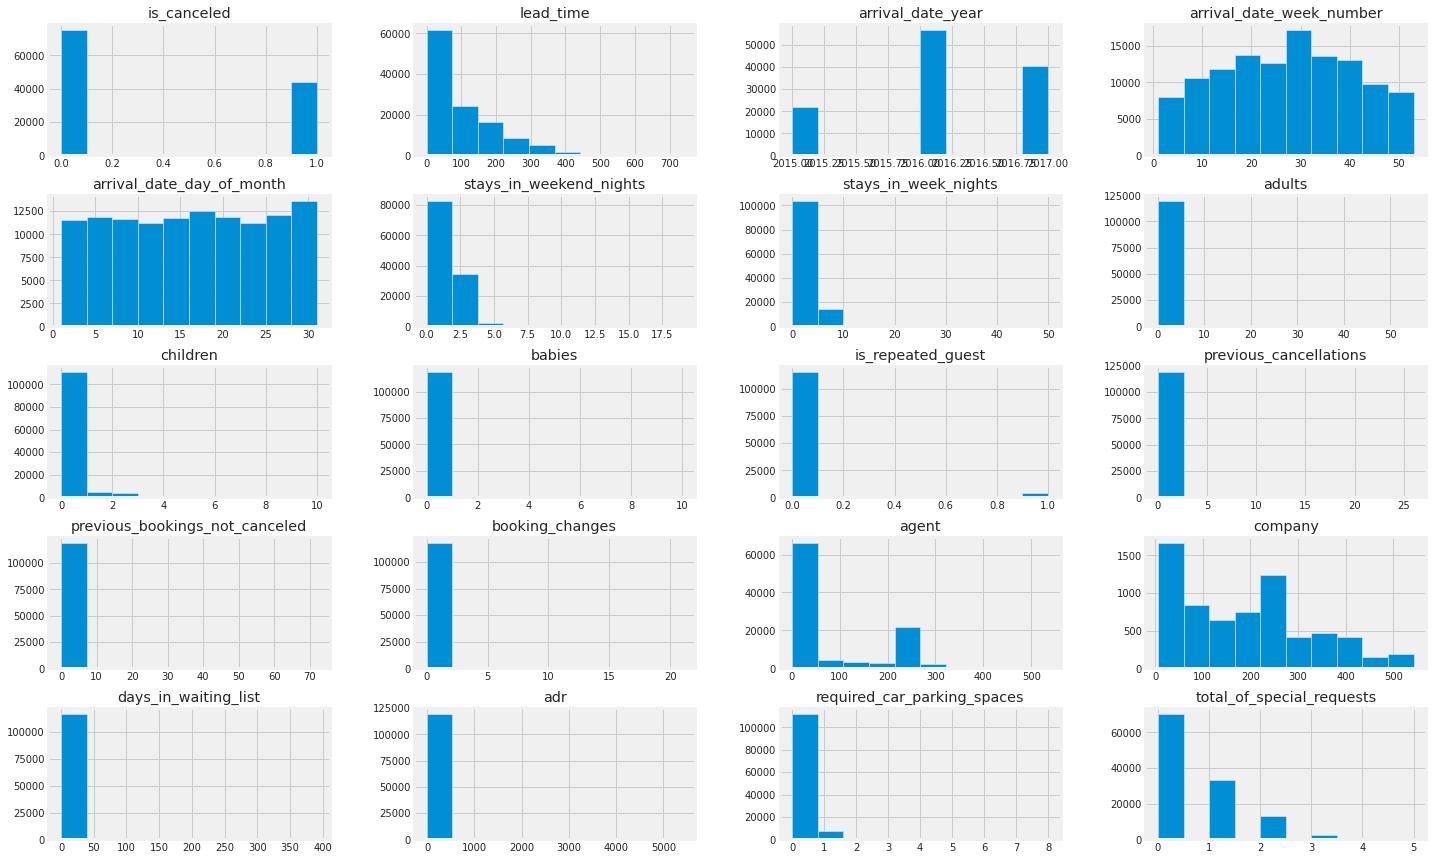

In [13]:
#Histogram Representation of Numerical Features
data.hist(figsize=(22,15))
plt.show()

<b>Observation</b> :

<li>The feature average_daily_rate have minimum value to be negative which is not possible as average rate can not be negative.
<li>The average cancelations are 37.04% and it deviates by 48.29% indicating lots of variations between cancelation.
<li>looking at the special request column, we found that around 75% of the customers asked for one special request.

In [14]:
# checking for any missing values count for features
data.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [15]:
# checking for any missing values count along with percentage for features

perc_missing_data = pd.DataFrame([data.isnull().sum(),data.isnull().sum()*100.0/data.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


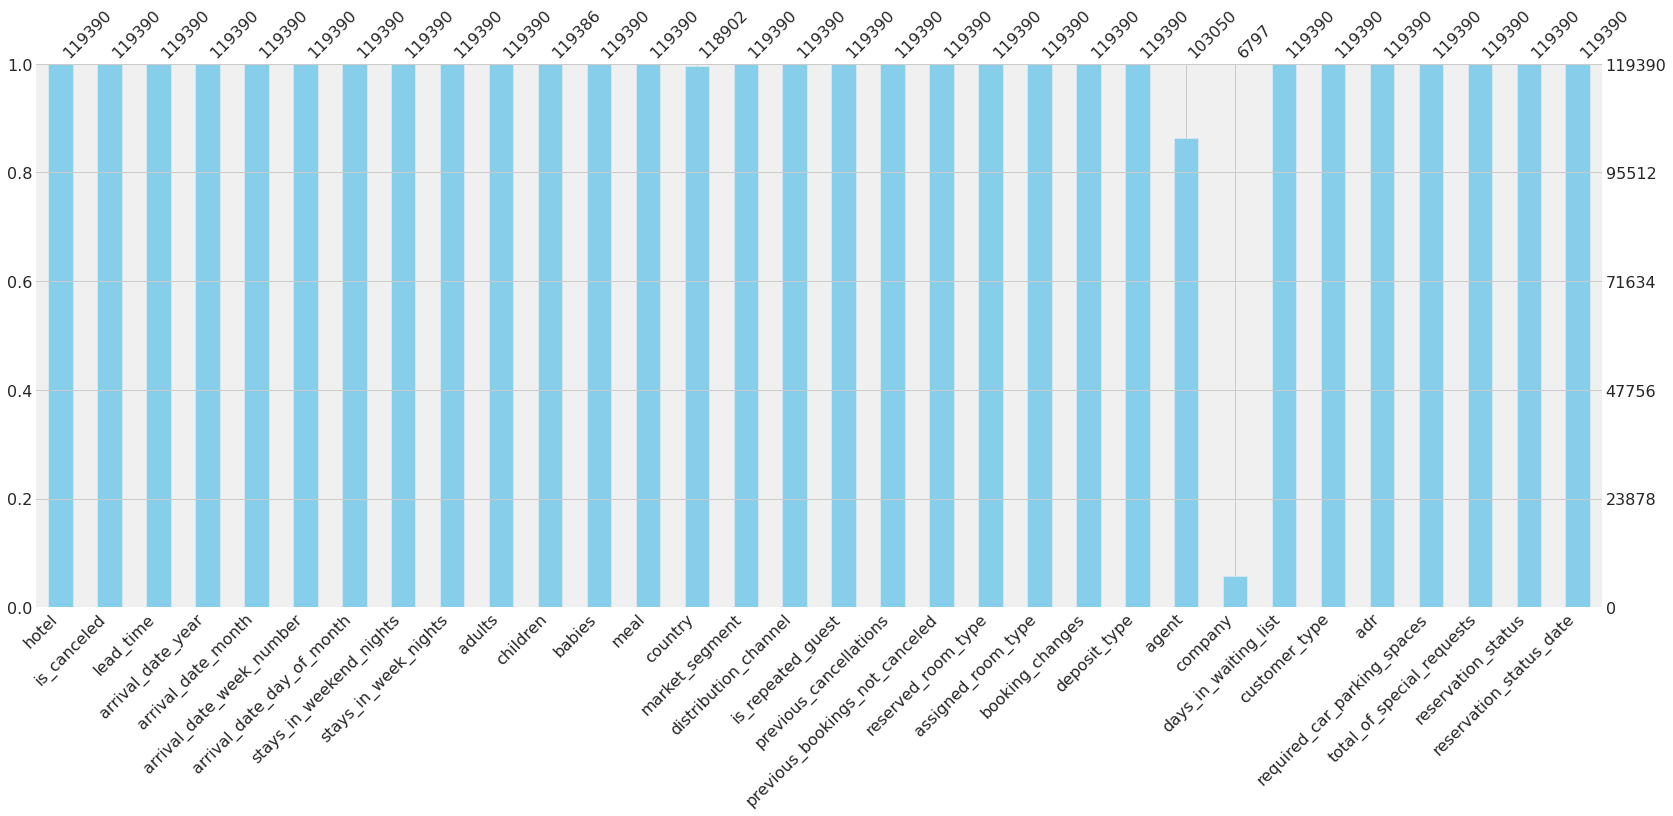

In [16]:
#easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness of your dataset
msno.bar(data, color='skyblue')
plt.show()

0.003% of rows have missing information for children. Let's look at distribution of children to fill missing information

In [17]:
# column - children too have missing values.
# children column is a numeric column 
# we will replace the null values with the null value as replacing with mean might end up giving us a floating value and count of children cannot be in decimals.


data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Most bookings had no children and hence we will fill the missing rows for children with value 0

In [18]:
#filling NA values with 0 
data['children'].fillna(0,inplace=True)

In [19]:
#checking for missing values
data['children'].isnull().sum()

0

In [20]:
#checking for count of missing values of childern attribute
data['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

0.4% of rows have missing information for country. Let's look at distribution of country to fill missing information

In [21]:
# Country column - which is a categorical column having country names.
# We have a few missing values in this column too.
# Replacing the missing vaLUES with highest occuring values.
perc_country_data = pd.DataFrame([data['country'].value_counts(),data['country'].value_counts()*100/data.shape[0]]).T
perc_country_data.columns = ['Count', '% Distribution']
perc_country_data

,Count,% Distribution
PRT,48590.0,40.698551
GBR,12129.0,10.159142
FRA,10415.0,8.723511
ESP,8568.0,7.176480
DEU,7287.0,6.103526
...,...,...
PYF,1.0,0.000838
NPL,1.0,0.000838
PLW,1.0,0.000838
SDN,1.0,0.000838


40.7% of bookings are from Portugal. Only 0.4% is missing information. We will fill the missing rows of country as Portugal since the distribution will not change by much and we still get to preserve data and discard the row.

In [22]:
#filling NA values with most occuring values  
data['country'].fillna('PRT',inplace=True)

In [23]:
#checking for missing values
data['country'].isnull().sum()

0

13% of agent ID and 94% of company ID is missing. It is possible to dive deep into the details of the dataset to find a correlation of missing information in agent ID and company ID vs other other features like market segment, distribution channel etc; For example most direct bookings may not have an agent ID or company ID and the information is probably null. It is therefore possible to fill these missing values based on other features however for simplicity, we will drop both the columns

In [24]:
#Dropping the agent and company columns 
data.drop(['agent','company'],axis=1,inplace=True)

Let's confirm all missing data have been handled

In [25]:
# checking for any missing values count along with percentage for features

perc_missing_data = pd.DataFrame([data.isnull().sum(),data.isnull().sum()*100.0/data.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


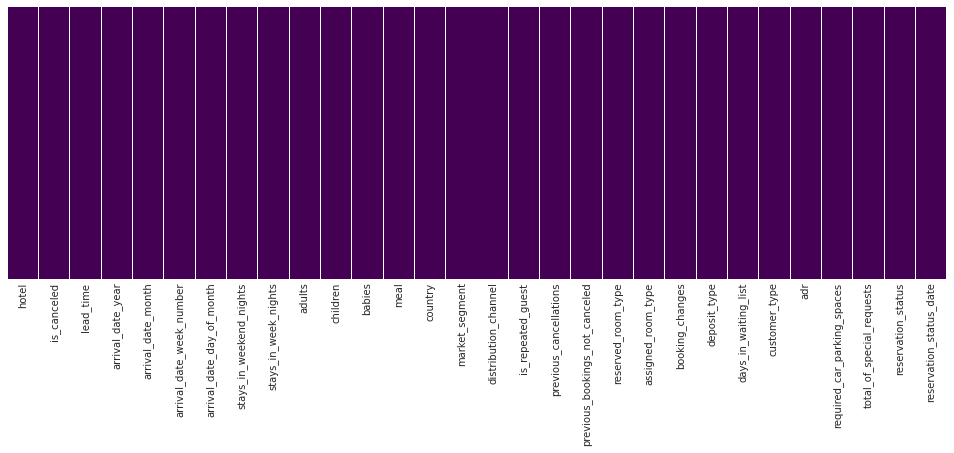

In [26]:
#heatmap for displaing missing values visually
sns.set_style('whitegrid')
fig,axes=plt.subplots(1,1,figsize=(15,5))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

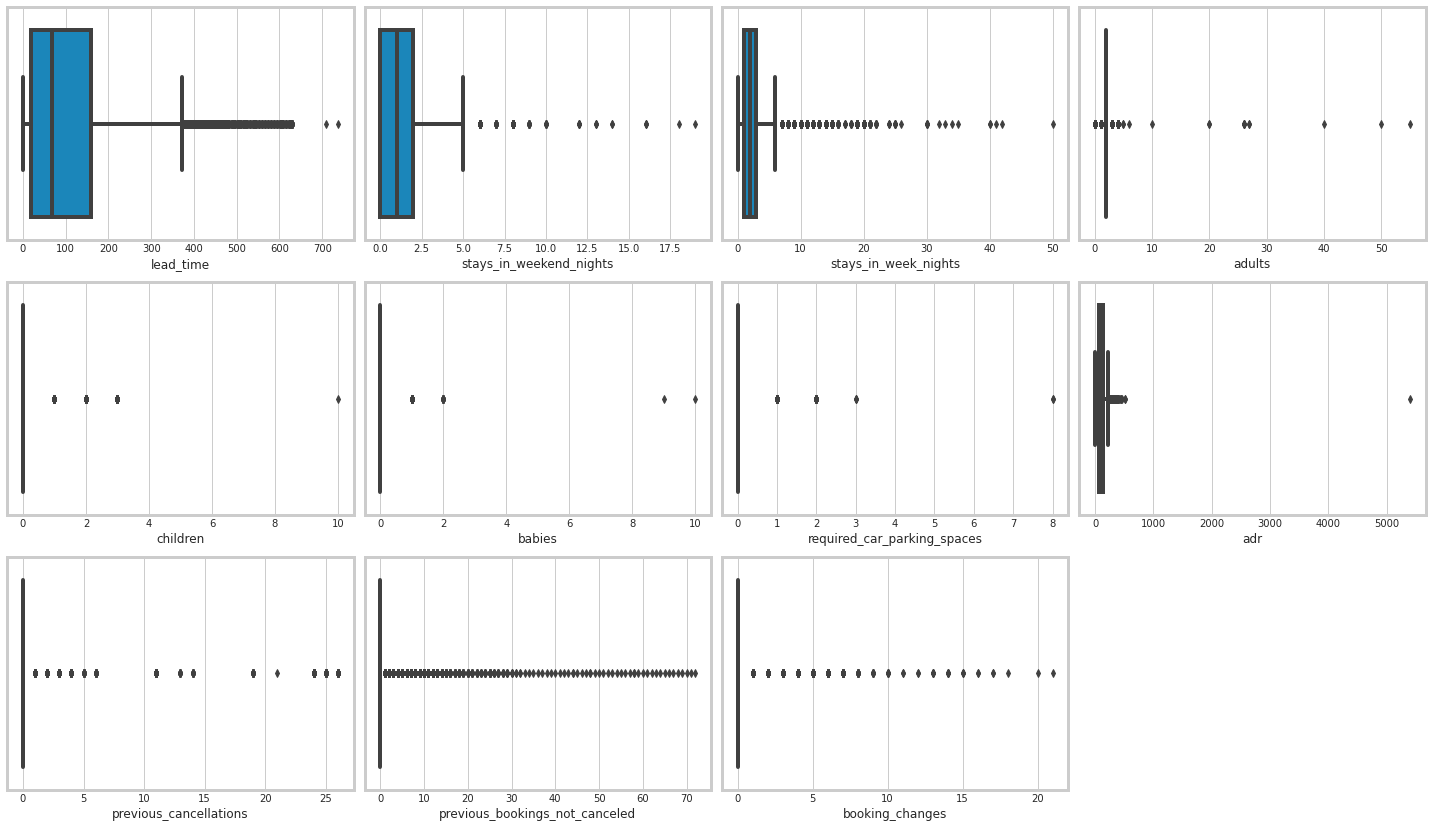

In [28]:
#finding the outliers with the boxplot
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

In [32]:
#outliers removal with assigning the values
data.loc[data.lead_time > 500, 'lead_time'] = 500
data.loc[data.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
data.loc[data.adults > 4, 'adults'] = 4
data.loc[data.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
data.loc[data.previous_cancellations > 0, 'previous_cancellations'] = 1
data.loc[data.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
data.loc[data.booking_changes > 5, 'booking_changes'] = 5
data.loc[data.babies > 8, 'babies'] = 0
data.loc[data.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
data.loc[data.children > 8, 'children'] = 0
data.loc[data.adr > 1000, 'adr'] = 1000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

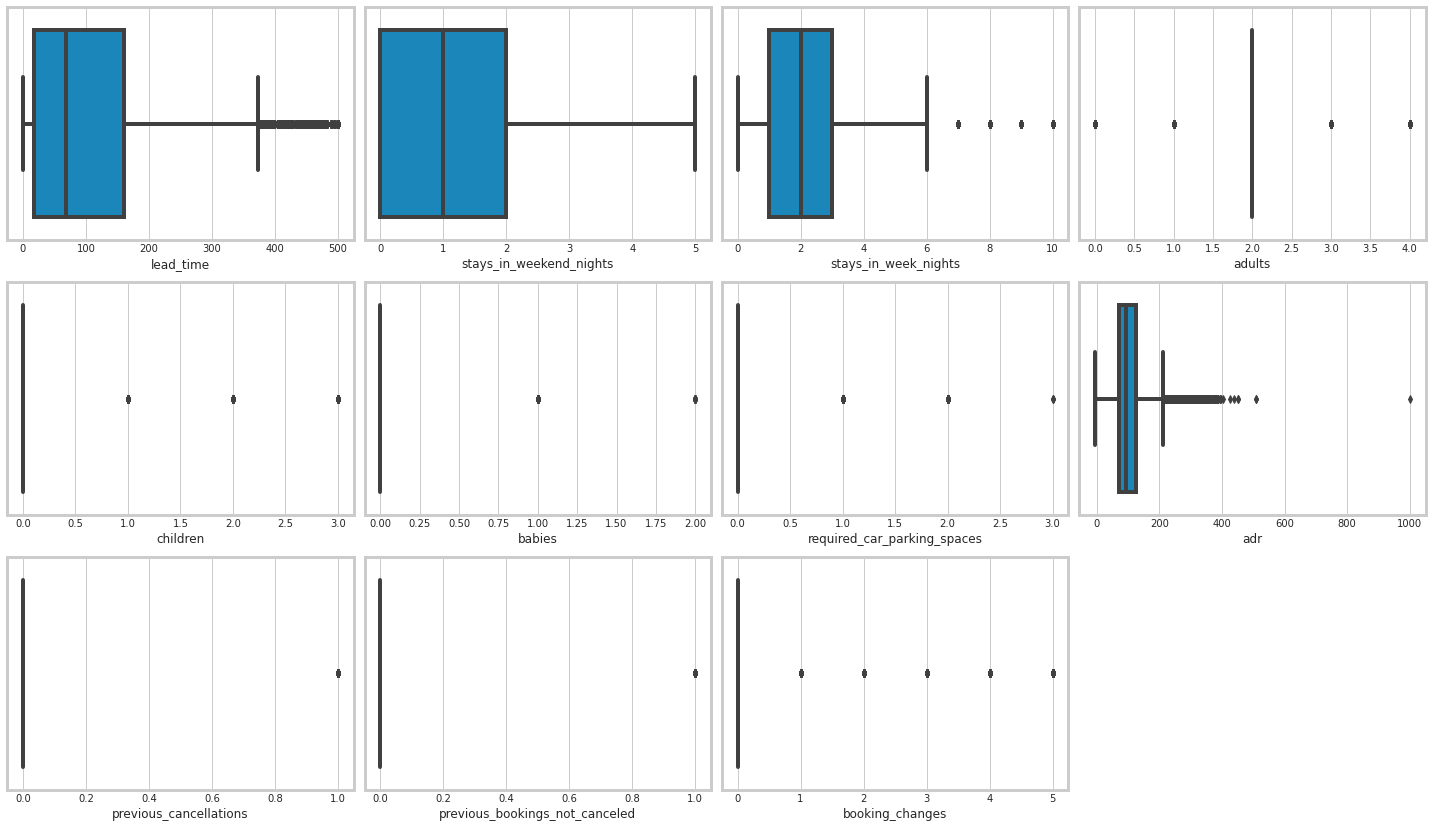

In [34]:
#checking the outliers
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(data[column])
  plt.tight_layout()

In [30]:
#To find out the number of bookings in different types of hotel.
booking_by_hotel_type=data["hotel"].value_counts().reset_index().rename(columns={'index':'Hotel','hotel':'Count'})
booking_by_hotel_type

,Hotel,Count
0,City Hotel,79330
1,Resort Hotel,40060


Text(0.5, 0, 'Number of bookings')

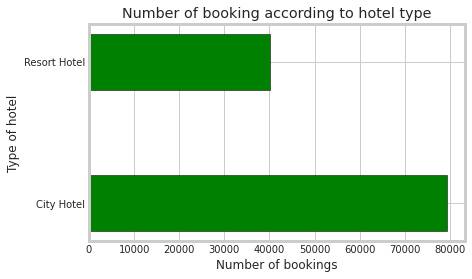

In [31]:
# plotting a bar chart to compare number of bookings made in each type of hotel
plt.barh(booking_by_hotel_type['Hotel'],booking_by_hotel_type['Count'],color='green',height=0.4,edgecolor='black')
plt.title('Number of booking according to hotel type')
plt.ylabel('Type of hotel')
plt.xlabel('Number of bookings')

In [35]:
#Finding the ratio between the number of bookings made in city hotel and resort hotel.
ratio_hotel=round(booking_by_hotel_type.loc[0]['Count']/booking_by_hotel_type.loc[1]['Count'],2)
print(ratio_hotel)

1.98


### **Perception**

City hotel are more in records than resort hotels this might be due to the one or more of the following reasons:

<li>City hotels might be cheaper than resort hotels.
<li>City Hotels are more than the resort hotels.
<li>Customers preference for city hotels over resort hotels.

People prefer City Hotel than a Resort Hotel by far(almost double).

In [36]:
#To find the number of bookings made in different months of each year
booking_by_time_of_the_year = df.groupby(['arrival_date_month','arrival_date_year'])['arrival_date_month'].count().unstack()
booking_by_time_of_the_year=booking_by_time_of_the_year.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
booking_by_time_of_the_year

arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,NaN,2248.0,3681.0
February,NaN,3891.0,4177.0
March,NaN,4824.0,4970.0
April,NaN,5428.0,5661.0
May,NaN,5478.0,6313.0
June,NaN,5292.0,5647.0
July,2776.0,4572.0,5313.0
August,3889.0,5063.0,4925.0
September,5114.0,5394.0,NaN


In [37]:
#To find the median of bookings made in year 2015 and 2017.
booking_2015_median = booking_by_time_of_the_year[2015].median()
booking_2017_median = booking_by_time_of_the_year[2017].median()
#Filling the missing values with median for respective year.
modified_booking_by_time_of_the_year=booking_by_time_of_the_year.fillna(value={2015:booking_2015_median,2017:booking_2017_median})
modified_booking_by_time_of_the_year

arrival_date_year,2015,2016,2017
arrival_date_month,,,
January,3404.5,2248.0,3681.0
February,3404.5,3891.0,4177.0
March,3404.5,4824.0,4970.0
April,3404.5,5428.0,5661.0
May,3404.5,5478.0,6313.0
June,3404.5,5292.0,5647.0
July,2776.0,4572.0,5313.0
August,3889.0,5063.0,4925.0
September,5114.0,5394.0,5141.5


Text(0, 0.5, 'Number of bookings')

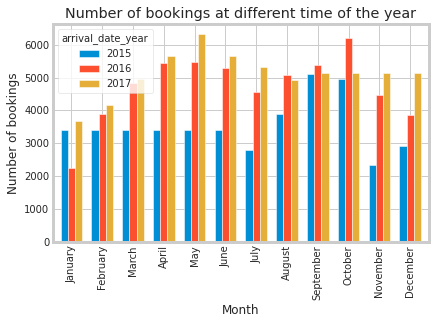

In [38]:
#Plotting a bar chart to show the number of bookings made in different months of each year.
modified_booking_by_time_of_the_year.plot(kind='bar',width=0.7)
plt.title('Number of bookings at different time of the year')
plt.xlabel('Month')
plt.ylabel('Number of bookings')

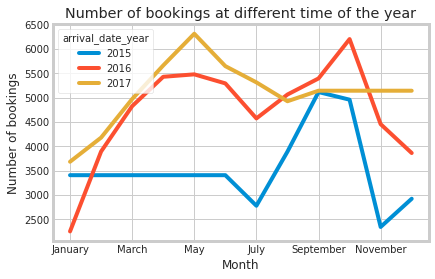

In [39]:
#Plotting a line graph to show the variation in number of bookings in different months.
modified_booking_by_time_of_the_year.plot()
plt.title('Number of bookings at different time of the year')
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)

### **Perception**

*   Number of bookings at the same time of the year has been on a rise with each passing year.
*   Each year sees a high number of booking around may and october.


In [41]:
#to find the top 10 countries,where the booking has been made from.
#NA values are replaced by 'Unknown'
top_20_countries=df.fillna(value={'country':'Unknown'})['country'].value_counts().reset_index().rename(columns={'index':'country','country':'booking'}).head(20)
top_20_countries

,country,booking
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


Text(0, 0.5, 'Number of bookings')

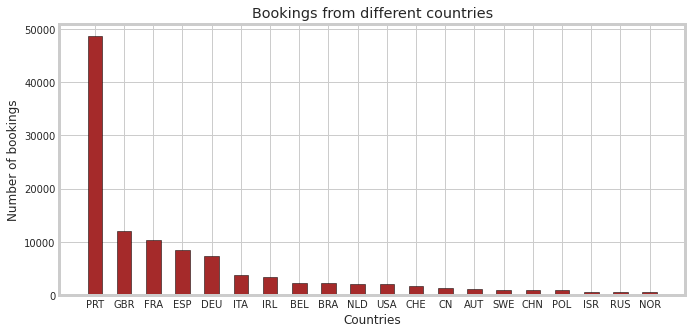

In [59]:
#plotting the top 10 countries on a bar plot.
plt.bar(top_20_countries['country'],top_20_countries['booking'],width=0.5,color='brown',edgecolor='black')
plt.title('Bookings from different countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')

In [60]:
basemap = folium.Map()
booking_map = px.choropleth(top_20_countries, locations = top_20_countries['country'],
                           color = top_20_countries['booking'], hover_name = top_20_countries['country'])
booking_map.show()

### **Perception**

The hotels had disproportionately high number of bookings from Portugal followed by Great Britain,France,Spain and Germany.

In [43]:
#To find the number of bookings made to different types of rooms.
room_type=df['reserved_room_type'].value_counts().reset_index().rename(columns={'index':'room type','reserved_room_type':'bookings'})
room_type

,room type,bookings
0,A,85994
1,D,19201
2,E,6535
3,F,2897
4,G,2094
5,B,1118
6,C,932
7,H,601
8,P,12
9,L,6


### **Perception**

*   Almost 75% of the total bookings have been made to room type 'A'
*   Room type 'D' comes at the second position with less one-fifth of the total bookings.
*All the other types of rooms are booked not a lot times when compared with these.



In [44]:
#To find the trend in room type preference at different months.
room_type_by_month=df.groupby(['arrival_date_month','reserved_room_type'])['reserved_room_type'].count().unstack().fillna(0)
room_type_by_month=room_type_by_month.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
room_type_by_month

reserved_room_type,A,B,C,D,E,F,G,H,L,P
arrival_date_month,,,,,,,,,,
January,4644.0,80.0,16.0,657.0,291.0,128.0,87.0,26.0,0.0,0.0
February,6091.0,87.0,44.0,1098.0,405.0,177.0,127.0,38.0,0.0,1.0
March,7114.0,93.0,40.0,1626.0,560.0,191.0,146.0,24.0,0.0,0.0
April,7727.0,90.0,58.0,2005.0,702.0,292.0,171.0,40.0,0.0,4.0
May,8311.0,52.0,61.0,2203.0,648.0,262.0,210.0,44.0,0.0,0.0
June,7895.0,55.0,112.0,1821.0,526.0,261.0,198.0,71.0,0.0,0.0
July,8197.0,153.0,213.0,2385.0,902.0,364.0,335.0,108.0,4.0,0.0
August,8920.0,173.0,267.0,2657.0,902.0,487.0,357.0,110.0,2.0,2.0
September,8080.0,63.0,43.0,1422.0,461.0,231.0,163.0,45.0,0.0,0.0


Text(0, 0.5, 'Number of bookings')

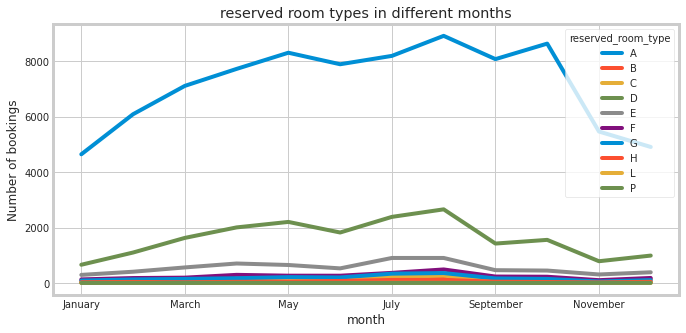

In [45]:
# plotting the trend in room type preference at different months.
room_type_by_month.plot()
plt.title('reserved room types in different months')
plt.xlabel('month')
plt.ylabel('Number of bookings')

The room type A is prefered by most number of people followed by type D and type E.Each of these types follows almost similar contours.

In [46]:
#To find number of adults in each booking.
df['adults'].value_counts().reset_index().rename(columns={'index':'adults','adults':'bookings'})


,adults,bookings
0,2,89680
1,1,23027
2,3,6202
3,0,403
4,4,62
5,26,5
6,27,2
7,20,2
8,5,2
9,55,1


### **Perception**

Around 75% of the bookings consist of two adults.

In [47]:
#To find number of bookings on different days of month across all years.
df.groupby('arrival_date_day_of_month')['hotel'].count().reset_index().rename(columns={'index':'arrival_date_day_of_month','hotel':'bookings'})

,arrival_date_day_of_month,bookings
0,1,3626
1,2,4055
2,3,3855
3,4,3763
4,5,4317
5,6,3833
6,7,3665
7,8,3921
8,9,4096
9,10,3575


In [48]:
#To find number of stays in week mights and weekend nights.
week_and_weekend_stay=df[['stays_in_weekend_nights','stays_in_week_nights']].sum().reset_index().rename(columns={'index':'time of week',0:'stays'})
week_and_weekend_stay

,time of week,stays
0,stays_in_weekend_nights,110746
1,stays_in_week_nights,298511


Text(0.5, 0, 'Nights of stay')

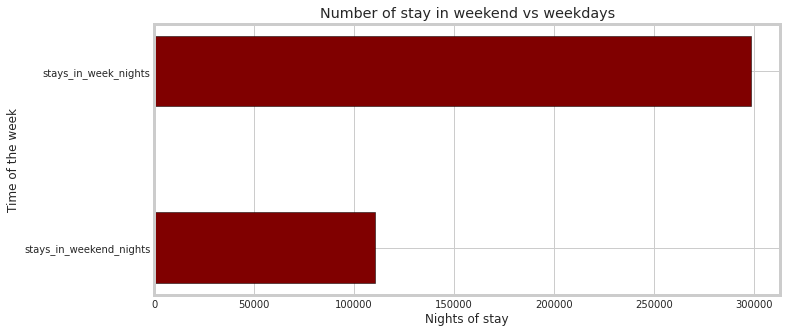

In [49]:
#Plotting number of week night and weekend nights on a bar chart.
plt.barh(week_and_weekend_stay['time of week'],week_and_weekend_stay['stays'],color='maroon',edgecolor='black',height=0.4)
plt.title('Number of stay in weekend vs weekdays')
plt.ylabel('Time of the week')
plt.xlabel('Nights of stay')


In [50]:
#To find number of bookings made through different market segments
bookings_by_market_segment=df.groupby('market_segment')['hotel'].count().reset_index().rename(columns={'hotel':'bookings'})
bookings_by_market_segment

,market_segment,bookings
0,Aviation,237
1,Complementary,743
2,Corporate,5295
3,Direct,12606
4,Groups,19811
5,Offline TA/TO,24219
6,Online TA,56477
7,Undefined,2


Text(0, 0.5, 'Number of bookings')

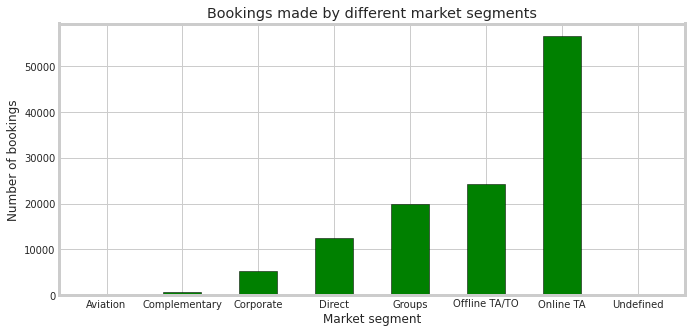

In [51]:
#Plotting bookings made through different market segments on a bar chart.
plt.bar(bookings_by_market_segment['market_segment'],bookings_by_market_segment['bookings'],width=0.5,color='green',edgecolor='black')
plt.title('Bookings made by different market segments')
plt.xlabel('Market segment')
plt.ylabel('Number of bookings')

### **Perception**

*   Most of the bookings where made by onlline travel agencies
*   Offline travel agencies,groups and direct bookings comes in second,third and fourth position respectively in terms of number of bookings made


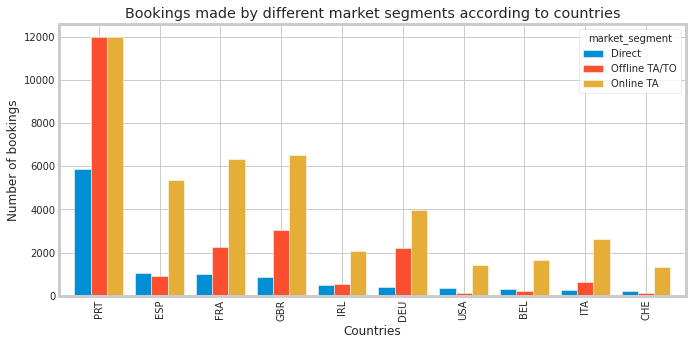

In [52]:
#Plotting bookings made through three main market segments by different countries' 
market_segment_by_country=df.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)

In [53]:
#To find number of cancelled bookings.
cancellation=df['is_canceled'].value_counts().reset_index().rename(columns={'index':'cancellation status','is_canceled':'number'})
cancellation

,cancellation status,number
0,0,75166
1,1,44224


In [54]:
#To find percentage of bookings which are cancelled.
percentage_cancellation=round(cancellation.loc[1]['number']/(cancellation.loc[0]['number']+cancellation.loc[1]['number']),4)*100
percentage_cancellation

37.04

In [55]:
#To find cancellation in different hotel types.
cancellation_by_hotel_type=df.groupby('hotel')['is_canceled'].sum().reset_index().rename(columns={'is_canceled':'cancellations'})
cancellation_by_hotel_type

,hotel,cancellations
0,City Hotel,33102
1,Resort Hotel,11122


In [56]:
#To find percentage of bookings cancelled in different type of hotels.
booking_and_cancellation=pd.merge(booking_by_hotel_type,cancellation_by_hotel_type,left_on='Hotel',right_on='hotel',how='inner').drop(labels='hotel',axis=1).rename(columns={'Count':'Bookings'})
booking_and_cancellation['cancellation_percentage']=round(booking_and_cancellation['cancellations']/booking_and_cancellation['Bookings'],2)*100
booking_and_cancellation

,Hotel,Bookings,cancellations,cancellation_percentage
0,City Hotel,79330,33102,42.0
1,Resort Hotel,40060,11122,28.0


Text(0, 0.5, 'Number of bookings and cancellations')

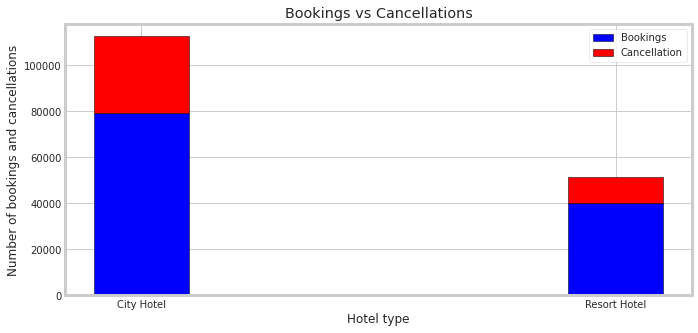

In [61]:
#Plotting bookings and cancellation for different types of hotel on a stacked bar chart.
plt.bar(booking_and_cancellation['Hotel'],booking_and_cancellation['Bookings'],color='blue',width=0.2,edgecolor='black')
plt.bar(booking_and_cancellation['Hotel'],booking_and_cancellation['cancellations'],bottom=booking_and_cancellation['Bookings'],color='red',width=0.2,edgecolor='black')
plt.legend(['Bookings','Cancellation'])
plt.title('Bookings vs Cancellations')
plt.xlabel('Hotel type')
plt.ylabel('Number of bookings and cancellations')


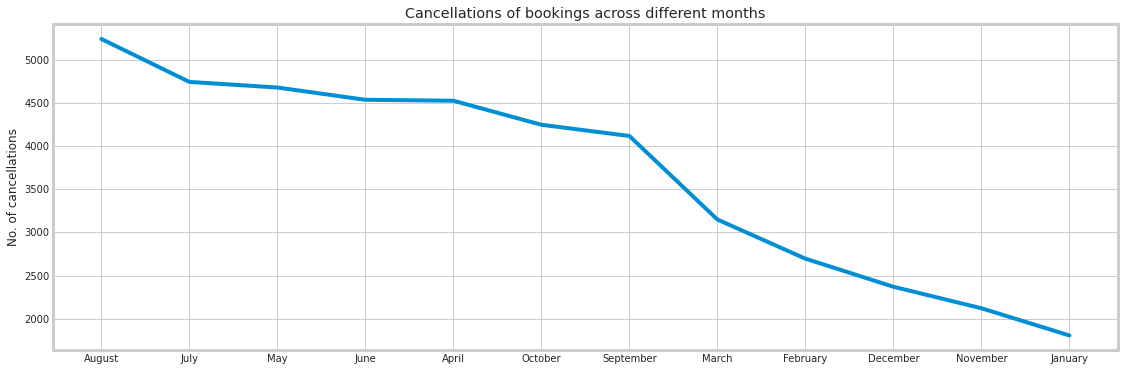

In [63]:
#cancellations over different months
plt.figure(figsize=(17,6))
sns.lineplot(x= data[data['is_canceled']==1]['arrival_date_month'].value_counts().index,y=data[data['is_canceled']==1]['arrival_date_month'].value_counts().values)
plt.ylabel('No. of cancellations')
plt.title("Cancellations of bookings across different months");

In [58]:
country_wise_guests = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,NAM,1
161,MLI,1
162,BDI,1
163,TJK,1


### **Perception**

1.   Over the year, summer months(April-August) experienced the highest number of cancellations 
2.   However, the winter months(November-January) had the least cancellations


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

# **Conclusion**
> * May-August happens to be the busiest months but so the hotels should target more customers and try to do more business during these times.
* It is quite clear most customers travel in pairs and bringing children or babies along is very rare so the hotels could advertise in ways that attract couples more. 
* Hotel has very few repeated guest, feedback can be collected to plan strategies accordingly. Hotel should collaborate with online marketing companies to advertise itself. 
* Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel. 
* Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
* Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.
* Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies. 
* Encourage Direct bookings by offering special discounts.